# Data@ANZ Virtual Internship

# Task 1: EDA

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

The dataset is designed to simulate realistic transaction behaviours that are observed in ANZ’s real transaction data, so many of the insights you can gather from the tasks below will be genuine.


○ Load the transaction dataset below into an analysis tool of your choice (Excel, R, SAS, Tableau, or similar)

○ Start by doing some basic checks – are there any data issues? Does the data need to be cleaned?

○ Gather some interesting overall insights about the data. For example -- what is the average transaction amount? How many transactions do customers make each month, on average?

○ Segment the dataset by transaction date and time. Visualise transaction volume and spending over the course of an average day or week. Consider the effect of any outliers that may distort your analysis.

○ For a challenge – what insights can you draw from the location information provided in the dataset?

In [1]:
# Importing Libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Importing the dataset
df = pd.read_excel('dataset/ANZ synthesised transaction dataset.xlsx')
df.to_csv('dataset/ANZ.csv')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [4]:
df.shape

(12043, 23)

In [5]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [6]:
# Checking for missing values
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [7]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [8]:
df.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
dtype: int64

**We can see that there are columns which are not of any use such as country, merchant_code, currency these all have only one value so we can drop them.**

In [10]:
df.shape

(12043, 23)

In [13]:
df.drop(['country', 'merchant_code', 'currency'], axis = 1, inplace = True)
df.head(3)

,status,card_present_flag,bpay_biller_code,account,long_lat,txn_description,merchant_id,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,CUS-2142601169,151.21 -33.87,debit


In [14]:
df.shape

(12043, 20)

## EDA (Exploratory Data Analysis)

In [21]:
import datetime as dt
df['weekday'] = df['date'].dt.day_name()
df.weekday.head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: weekday, dtype: object

In [24]:
df.weekday.value_counts()

Friday       2073
Wednesday    2063
Thursday     1801
Saturday     1709
Sunday       1550
Tuesday      1487
Monday       1360
Name: weekday, dtype: int64

In [26]:
df['month_name'] = df['date'].dt.month_name()
df.month_name.head()

0    August
1    August
2    August
3    August
4    August
Name: month_name, dtype: object

In [27]:
df.month_name.value_counts()

October      4087
September    4013
August       3943
Name: month_name, dtype: int64

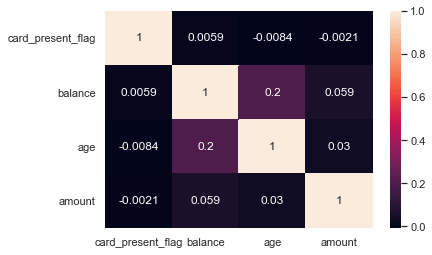

In [32]:
sns.heatmap(df.corr(), annot = True)

## Average Transaction for each month

In [37]:
aug = df[df["month_name"] == 'August']
print(f"Average transaction of month August is : {aug.loc[:, 'amount'].mean()}")

Average transaction of month August is : 185.12186659903654


In [38]:
sep = df[df['month_name'] == "September"]
print(f"Average transaction of month September is : {sep.loc[:, 'amount'].mean()}")

Average transaction of month September is : 182.04590331422853


In [39]:
oct = df[df['month_name'] == 'October']
print(f"Average transaction of month October is : {oct.loc[:, 'amount'].mean()}")

Average transaction of month October is : 196.42732321996542


## Maximum and Minimum Transaction for each month

In [42]:
print(f"Maximum Trancation in August Month is : {aug.loc[:, 'amount'].max()}")
print(f"Minimum Trancation in August Month is : {aug.loc[:, 'amount'].min()}")

Maximum Trancation in August Month is : 8835.98
Minimum Trancation in August Month is : 1.52


In [43]:
print(f"Maximum Trancation in September Month is : {sep.loc[:, 'amount'].max()}")
print(f"Minimum Trancation in September Month is : {sep.loc[:, 'amount'].min()}")

Maximum Trancation in September Month is : 8835.98
Minimum Trancation in September Month is : 0.1


In [44]:
print(f"Maximum Trancation in October Month is : {oct.loc[:, 'amount'].max()}")
print(f"Minimum Trancation in October Month is : {oct.loc[:, 'amount'].min()}")

Maximum Trancation in October Month is : 8835.98
Minimum Trancation in October Month is : 0.1


## Monthly Transaction Analysis

**For the month of August**
- Average Transaction :  185.12186659903654
- Maximum Transaction :  8835.98
- Minimum Transaction :  1.52

**For the month of September**
- Average Transaction :  182.04590331422853
- Maximum Transaction :  8835.98
- Minimum Transaction :  0.1

**For the month of October**
- Average Transaction :  196.42732321996542
- Maximum Transaction :  8835.98
- Minimum Transaction :  0.1

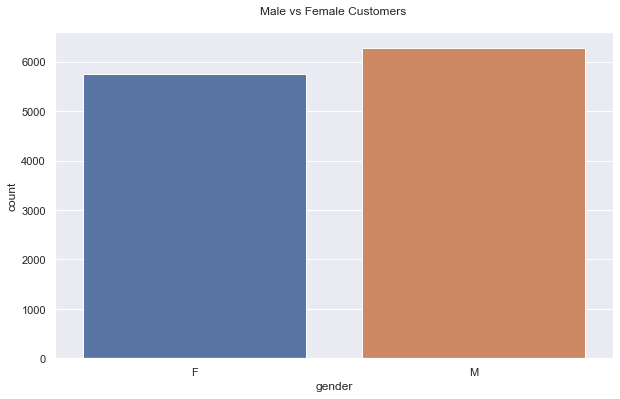

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(df.gender).set(title = "Male vs Female Customers \n")
plt.show()

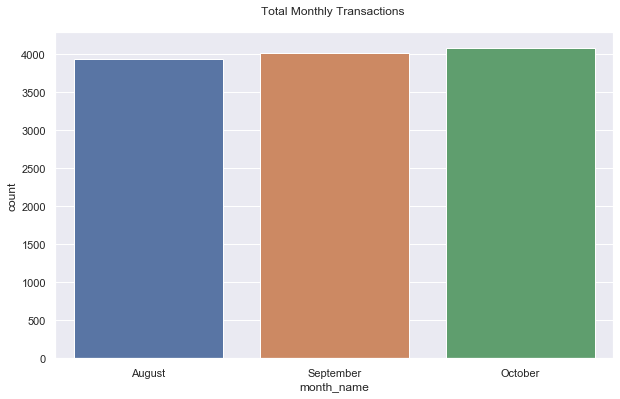

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(df.month_name).set(title = "Total Monthly Transactions \n")
plt.show()

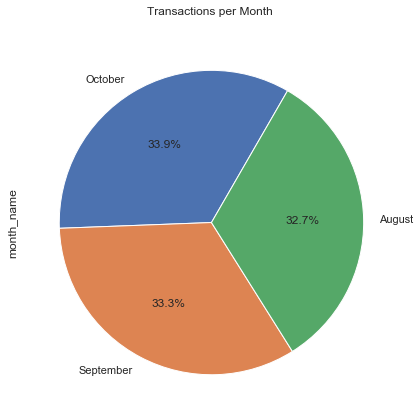

In [75]:
plt.figure(figsize=(7, 7))
df['month_name'].value_counts().plot.pie(autopct='%1.1f%%',startangle=60)
plt.title('Transactions per Month \n')
plt.show()

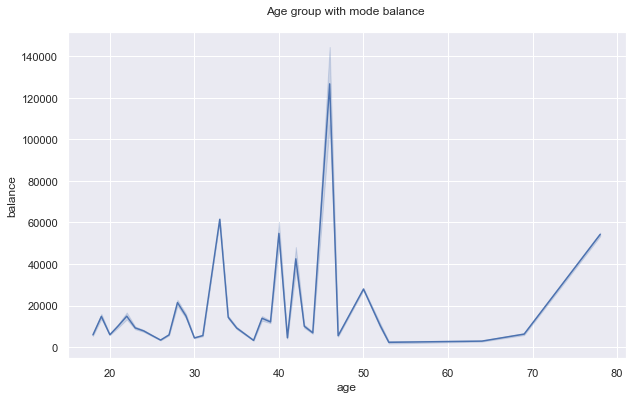

In [67]:
plt.figure(figsize=(10, 6))
sns.lineplot(x = 'age', y = 'balance', data = df).set(title = "Age group with mode balance \n")
plt.show()

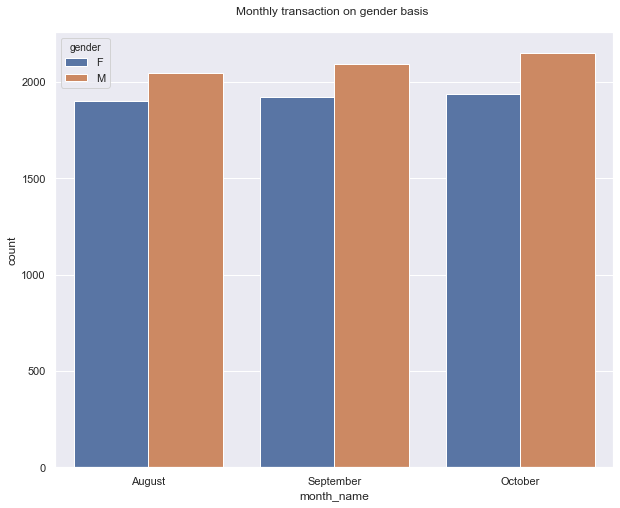

In [71]:
plt.figure(figsize=(10, 8))
sns.countplot(df.month_name, hue = df.gender).set(title = 'Monthly transaction on gender basis \n')
plt.show()

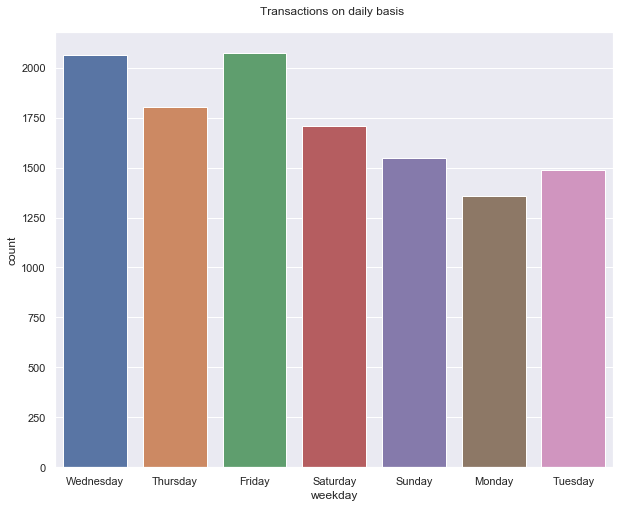

In [74]:
plt.figure(figsize=(10, 8))
sns.countplot(df.weekday).set(title = "Transactions on daily basis \n")
plt.show()

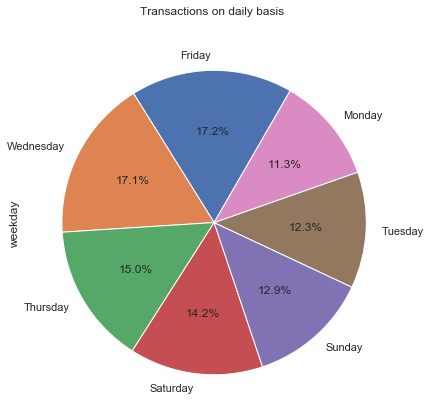

In [79]:
plt.figure(figsize=(7, 7))
df.weekday.value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title("Transactions on daily basis \n")
plt.show()

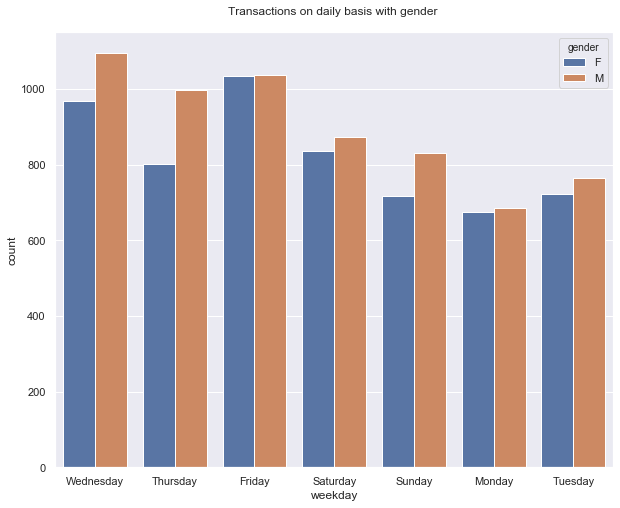

In [83]:
plt.figure(figsize=(10, 8))
sns.countplot(df.weekday, hue = df.gender).set(title = 'Transactions on daily basis with gender \n')
plt.show()

In [84]:
df['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

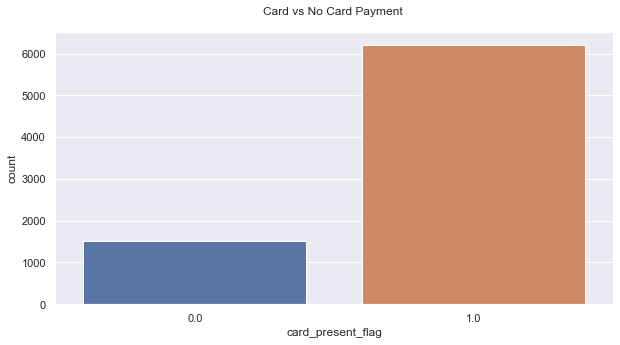

In [88]:
plt.figure(figsize=(10, 5))
sns.countplot(df['card_present_flag']).set(title = 'Card vs No Card Payment \n')
plt.show()

In [90]:
df.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

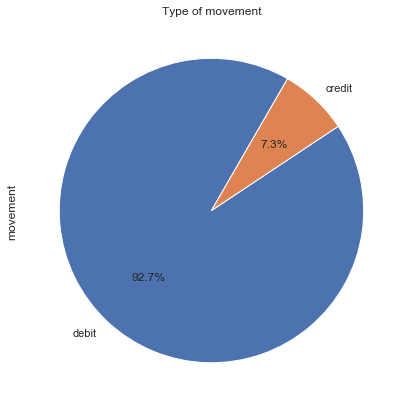

In [89]:
plt.figure(figsize=(7, 7))
df['movement'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('Mode of movement')
plt.show()

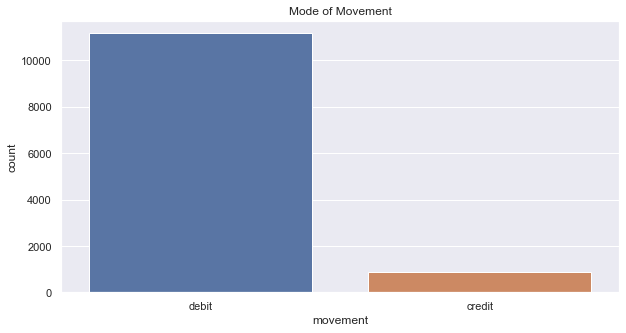

In [92]:
plt.figure(figsize=(10, 5))
sns.countplot(df.movement).set(title = "Mode of Movement")
plt.show()

In [93]:
df.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

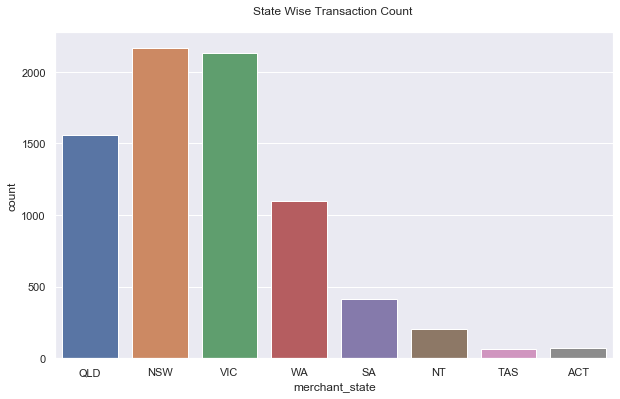

In [97]:
plt.figure(figsize=(10, 6))
sns.countplot(df.merchant_state).set(title = 'State Wise Transaction Count \n')
plt.show()

In [96]:
df.txn_description.value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

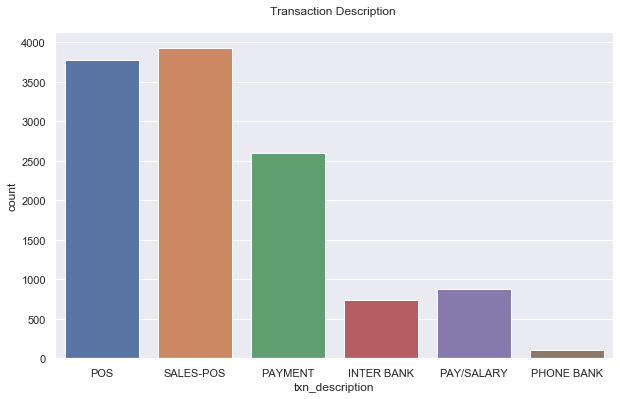

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(df.txn_description).set(title = 'Transaction Description \n')
plt.show()

In [100]:
top_10_customers = df.first_name.value_counts(sort = True).head(10)
top_10_customers

Michael        746
Diana          578
Jessica        408
Joseph         391
Jeffrey        388
Richard        364
Kimberly       343
Tonya          292
Susan          282
Christopher    263
Name: first_name, dtype: int64

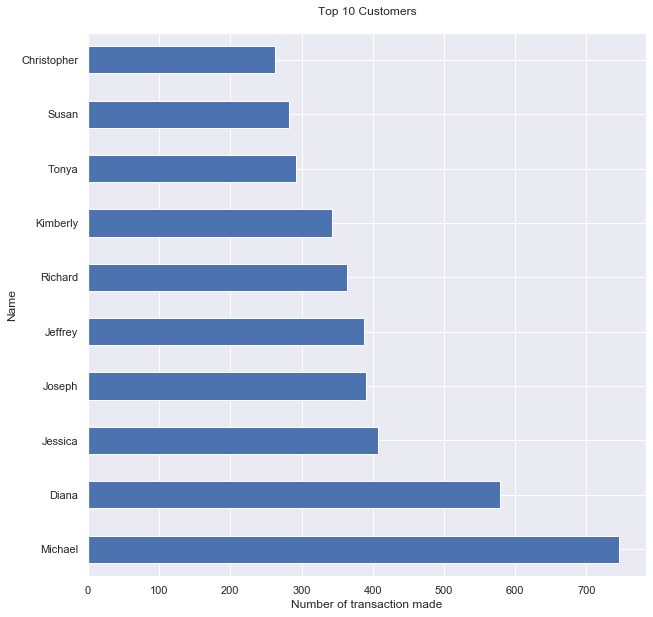

In [108]:
fig,ax = plt.subplots(figsize=(10,10)) 
top_10_customers.plot.barh()
ax.set(title="Top 10 Customers\n", xlabel="Number of transaction made", ylabel="Name")
plt.show()

## Time Series Analysis

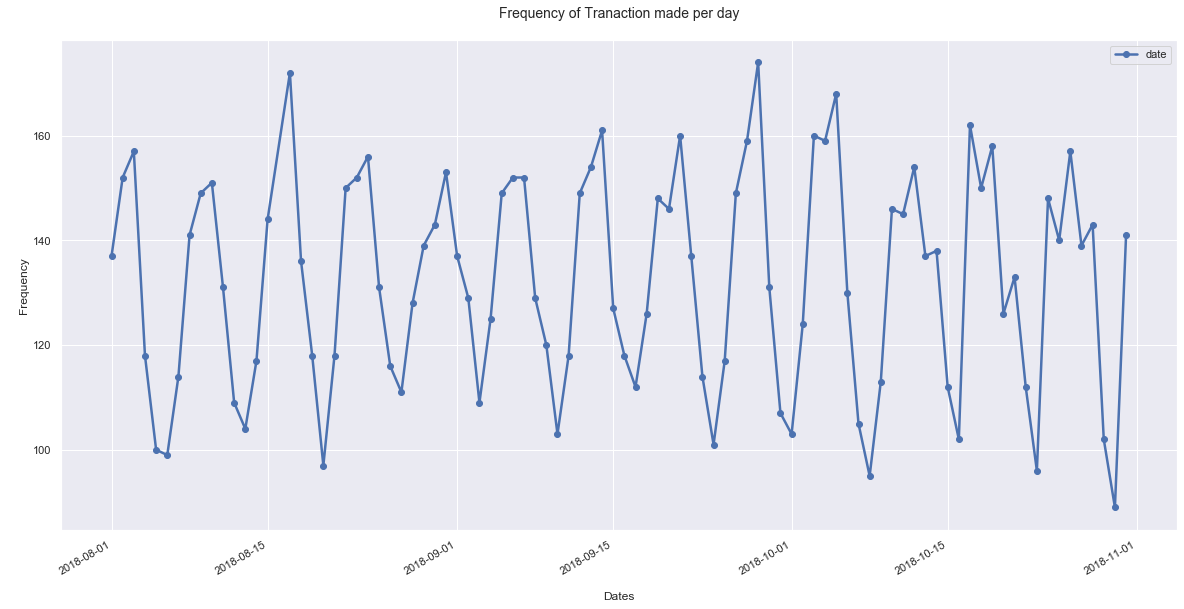

In [112]:
df.date.value_counts(sort = True).plot(kind = 'line', linewidth = 2.5, linestyle = '-', marker = 'o', figsize = (20, 10))
plt.xlabel("\nDates")
plt.ylabel("\nFrequency")
plt.title('Frequency of Tranaction made per day\n', fontdict = {'fontsize' : 14})
plt.legend()
plt.show()